# Visualizations of Glassdoor's ratings vs. my scores

In this notebook, I will do the simpler visualization of comparing Glassdoor's ratings vs. my scores. 

In [1]:
import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#set default seaborn plotting style
sns.set_style('white')

import time

## Import Glassdoor reviews and companies data

In [2]:
start_time = time.time()

reviews = pd.read_csv('glassdoor_reviews_2.csv')

original_reviews = reviews.copy()

#each review's "Author Title" should be of format "Employee Status - Job Title"
# for example, "Current Employee - Senior Engineer"

#determine how many parts each review's "Author Title" has (should be 2)
reviews.loc[:,'title_length'] = reviews.loc[:,'Author Title'].apply(lambda x: len(x.split(' - ')))

#only consider reviews of proper format "Employee Status - Author Title"
reviews = reviews[reviews['title_length'] == 2]
#could be omitting some job titles with 'dash' in name,
#but decreasing number of reviews from 2631927 to 2615691 (<1% change, so don't care)

#'Author Title' of all reviews now 2
reviews = reviews.drop('title_length', axis=1)

#break up "Author Title" into two columns: "Employee Status" and "Job Title"
reviews.loc[:,'Employee Status'] = reviews.loc[:,'Author Title'].apply(lambda x: x.split(' - ')[0])
reviews.loc[:,'Job Title'] = reviews.loc[:,'Author Title'].apply(lambda x: x.split(' - ')[1])

#remove 10 reviews have incorrect "Employee Status" 
#("Employee Status" not like "Current Employee", "Former Intern", etc.)
reviews = reviews[reviews['Employee Status'] != 'module.emp-review.current-'] #remove 4 reviews
reviews = reviews[reviews['Employee Status'] != 'module.emp-review.former-'] #remove 6 reviews

#add extra columns that states if employee is current or former employee
reviews.loc[:,'current_or_former'] = reviews.loc[:,'Employee Status'].apply(lambda x: x.split(' ')[0])

print('Took ' + str(time.time()-start_time) + ' seconds.')

/Users/derekjung/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Took 102.57377791404724 seconds.


In [3]:
reviews.head()

,Ticker Symbol,Entity Name,Dataset,CUSIP,ISIN,Unique ID,As Of Date,Review Url,Logo,Author Title,Author Location,Author Country,Summary,Description,PROs,CONs,Recommends Value,Recommends Description,Outlook Value,Outlook Description,CEO Review Value,CEO Review Description,Helpful Count,Rating: Overall,Rating: Work/Life Balance,Rating: Culture & Values,Rating: Career Opportunities,Rating: Comp & Benefits,Rating: Senior Management,Company Id,Company URL,Date Added,Date Updated,Ticker Sector,Ticker Industry,Employee Status,Job Title,current_or_former
0,vtx:rog,https://www.glassdoor.com?employer_id=274,2334043,NaN,CH0012032048,3066099,2018-09-10 04:00:00+00,https://www.glassdoor.com/Reviews/Employee-Rev...,https://media.glassdoor.com/sqls/274/genentech...,Current Contractor - Anonymous Contractor,NaN,NaN,"""Nice first job""",I have been working at Genentech as a contractor,Enjoy the research challenges faced everyday,"Without a phd, it's impossible for an upward c...",1.0,Recommends,0.0,Neutral Outlook,1.0,Approves of CEO,NaN,3,NaN,NaN,3.0,NaN,NaN,274,https://www.glassdoor.com/Overview/Working-at-...,2018-09-10 11:09:33.94152+00,2018-09-10 11:09:33.941552+00,Health Care,Pharmaceuticals & Biotechnology,Current Contractor,Anonymous Contractor,Current
1,bcs:falabella,https://www.glassdoor.com?employer_id=10976,2340459,NaN,NaN,3066108,2018-09-10 04:00:00+00,https://www.glassdoor.com/Reviews/Employee-Rev...,https://media.glassdoor.com/sqls/10976/falabel...,Current Employee - Senior Engineer,Bengaluru (India),IND,"""Best Place to Work""",I have been working at Falabella full-time (Le...,Lots to learnEmployee friendly policiesFree me...,No Cons as of now.,1.0,Recommends,0.0,Neutral Outlook,1.0,Approves of CEO,NaN,5,5.0,5.0,4.0,5.0,4.0,10976,https://www.glassdoor.com/Overview/Working-at-...,2018-09-10 11:37:46.166988+00,2018-09-10 11:37:46.167029+00,NaN,NaN,Current Employee,Senior Engineer,Current
2,asx:wow,https://www.glassdoor.com?employer_id=473193,2334022,NaN,NaN,3066097,2018-09-10 04:00:00+00,https://www.glassdoor.com/Reviews/Employee-Rev...,https://media.glassdoor.com/sqls/473193/big-w-...,Current Employee - Anonymous Employee,NaN,NaN,"""Overall good place to work""",I have been working at Big W part-time,people are fun and very helpful,the occassional manager who doesn't do anything,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,473193,https://www.glassdoor.com/Overview/Working-at-...,2018-09-10 11:07:27.618957+00,2018-09-10 11:07:27.618999+00,Consumer Services,Food & Drug Retailers,Current Employee,Anonymous Employee,Current
3,asx:wor,https://www.glassdoor.com?employer_id=35193,2334021,NaN,NaN,3066096,2018-09-10 04:00:00+00,https://www.glassdoor.com/Reviews/Employee-Rev...,https://media.glassdoor.com/sqls/35193/worleyp...,Former Employee - Anonymous Employee,NaN,NaN,"""Safety Engineer""",I worked at WorleyParsons full-time,Access to top notch resources that set you up ...,"I did not experience any 'remarkable"" cons",1.0,Recommends,NaN,NaN,1.0,Approves of CEO,NaN,5,5.0,5.0,4.0,4.0,4.0,35193,https://www.glassdoor.com/Overview/Working-at-...,2018-09-10 11:07:23.474903+00,2018-09-10 11:07:23.474945+00,NaN,NaN,Former Employee,Anonymous Employee,Former
4,nyse:xom,https://www.glassdoor.com?employer_id=237,2331755,30231G102,US30231G1022,3065906,2018-09-09 04:00:00+00,https://www.glassdoor.com/Reviews/Employee-Rev...,https://media.glassdoor.com/sqls/237/exxonmobi...,Former Employee - I T Analyst,"Houston, TX",USA,"""I.T. Analyst - Global Services Company""",I worked at ExxonMobil full-time (More than 10...,"Great benefits, smart co-workers, state of the...","Forced ranking, slow to adopt new technology, ...",1.0,Recommends,1.0,Positive Outlook,1.0,Approves of CEO,NaN,4,3.0,5.0,3.0,5.0,4.0,237,https://www.glassdoor.com/Overview/Working-at-...,2018-09-10 07:53:45.26833+00,2018-09-10 07:53:45.268361+00,Oil & Gas,Oil & Gas Producers,Former Employee,I T Analyst,Former


In [4]:
original_reviews = reviews.copy()

In [5]:
reviews = original_reviews.copy()

companies = pd.read_csv('reviewed_companies.csv', index_col='Unnamed: 0')

#only consider companies with at least this many reviews
min_reviews = 500

#company ID's of companies with at least 500 reviews
company_ids_at_least_min_reviews = companies[companies['count'] >= min_reviews].loc[:,'Company Id']

#only consider reviews of companies with at least 10 reviews
reviews = reviews[reviews['Company Id'].isin(company_ids_at_least_min_reviews)]

In [6]:
reviews.loc[:,'Company Id'].nunique()

273

In [7]:
company_ids_at_least_min_reviews

0          274
4          237
5          137
11        2800
12        1737
13         599
15         404
17          97
18         340
19        1242
22        1079
24        9011
25        6036
26        1838
28         488
34        3510
36        9079
40        4245
42       13345
44         437
46        7811
52         588
54        8874
57        3524
59         415
60         640
66         544
74        1651
80          28
81       32038
         ...  
1518      8348
1529      3456
1543      6433
1581       335
1619      7224
1658       554
1685     18934
1764      3358
1846      7207
1852      1715
1871     13956
1878      3768
2044     13229
2058      3765
2070     10350
2084     10228
2272    316191
2299       692
2361      3059
2633     10222
2664      3783
2762    226853
2822     11986
2933     10250
3119    118159
3178      4075
3509      3115
3557        72
3715      9347
3911     11763
Name: Company Id, Length: 273, dtype: int64

## Find my weighted averages for companies

I scored each companies in 5 categories and for PRO/CON. Thus, I created 10 scores for each company. However, Glassdoor only gives a single score for each for each category.

Here, I will combine the PRO and CON scores for each category to create a single score for each category. I will do this by taking a weighted average based on how many PRO and CON sentences there are for each company. 

In [8]:
#Pros and Cons ratings of companies
pros_cons_by_company = pd.read_csv('companies_pros_cons_ratings.csv', index_col='Unnamed: 0')

In [9]:
#only consider companies with at least min reviews (from above)
pros_cons_by_company = pros_cons_by_company[pros_cons_by_company['Company Id'].isin(company_ids_at_least_min_reviews)]

#set Company ID to be index
pros_cons_by_company = pros_cons_by_company.set_index('Company Id', drop=True)

In [10]:
print(pros_cons_by_company.columns)
pros_cons_by_company.head()

Index(['PROs Culture & Values mean', 'PROs Work/Life Balance mean',
       'PROs Senior Management mean', 'PROs Comp & Benefits mean',
       'PROs Career Opportunities mean', 'CONs Culture & Values mean',
       'CONs Work/Life Balance mean', 'CONs Senior Management mean',
       'CONs Comp & Benefits mean', 'CONs Career Opportunities mean',
       'PROs Culture & Values count', 'PROs Work/Life Balance count',
       'PROs Senior Management count', 'PROs Comp & Benefits count',
       'PROs Career Opportunities count', 'CONs Culture & Values count',
       'CONs Work/Life Balance count', 'CONs Senior Management count',
       'CONs Comp & Benefits count', 'CONs Career Opportunities count'],
      dtype='object')


,PROs Culture & Values mean,PROs Work/Life Balance mean,PROs Senior Management mean,PROs Comp & Benefits mean,PROs Career Opportunities mean,CONs Culture & Values mean,CONs Work/Life Balance mean,CONs Senior Management mean,CONs Comp & Benefits mean,CONs Career Opportunities mean,PROs Culture & Values count,PROs Work/Life Balance count,PROs Senior Management count,PROs Comp & Benefits count,PROs Career Opportunities count,CONs Culture & Values count,CONs Work/Life Balance count,CONs Senior Management count,CONs Comp & Benefits count,CONs Career Opportunities count
Company Id,,,,,,,,,,,,,,,,,,,,
8,0.532774,0.519078,0.469322,0.555796,0.495784,-0.069795,-0.010618,-0.098412,-0.056911,0.078058,450.0,281.0,85.0,789.0,204.0,613.0,320.0,395.0,471.0,205.0
12,0.547925,0.536132,0.495026,0.606038,0.528553,-0.017460,-0.028166,-0.034812,0.037819,0.034389,310.0,92.0,78.0,343.0,237.0,395.0,67.0,234.0,107.0,228.0
15,0.527925,0.498453,0.417663,0.500799,0.513879,-0.008189,-0.062289,-0.070796,0.080763,0.087642,686.0,280.0,155.0,281.0,219.0,585.0,87.0,451.0,249.0,275.0
16,0.541245,0.477149,0.473165,0.575033,0.509078,-0.016776,-0.047197,-0.071312,0.062570,0.041209,400.0,283.0,158.0,473.0,246.0,709.0,157.0,398.0,377.0,336.0
28,0.502125,0.457619,0.442790,0.460731,0.529465,-0.014362,-0.079071,-0.055045,0.063999,0.076830,1411.0,532.0,362.0,914.0,893.0,1736.0,462.0,1027.0,1131.0,879.0


In [11]:
#add new columns that gives total score each of 10 category-PRO/CON

categories = ['Culture & Values', 
              'Work/Life Balance', 
              'Senior Management', 
              'Comp & Benefits', 
              'Career Opportunities']

pro_con_cat_list = []

#create 10 new columns for total scores
for pro_con in ['PROs','CONs']:
    for cat in categories:
        pro_con_cat_list.append('{} {} '.format(pro_con, cat))

#calculate total scores for each of 10 bins
for idx in range(10):
    pros_cons_by_company.loc[:, pro_con_cat_list[idx] + 'total'] = \
        pros_cons_by_company.apply(lambda row: row[pro_con_cat_list[idx] + 'count'] * 
                                   row[pro_con_cat_list[idx] + 'mean'],
                                   axis=1)

In [12]:
#calculate total score for each category by adding PRO and CON score
for cat in categories:
    pros_cons_by_company.loc[:,cat + ' total'] = 
        pros_cons_by_company.loc[:,'PROs ' + cat + ' total'] + 
        pros_cons_by_company.loc[:,'CONs ' + cat + ' total']

In [13]:
pros_cons_by_company.head()

,PROs Culture & Values mean,PROs Work/Life Balance mean,PROs Senior Management mean,PROs Comp & Benefits mean,PROs Career Opportunities mean,CONs Culture & Values mean,CONs Work/Life Balance mean,CONs Senior Management mean,CONs Comp & Benefits mean,CONs Career Opportunities mean,PROs Culture & Values count,PROs Work/Life Balance count,PROs Senior Management count,PROs Comp & Benefits count,PROs Career Opportunities count,CONs Culture & Values count,CONs Work/Life Balance count,CONs Senior Management count,CONs Comp & Benefits count,CONs Career Opportunities count,PROs Culture & Values total,PROs Work/Life Balance total,PROs Senior Management total,PROs Comp & Benefits total,PROs Career Opportunities total,CONs Culture & Values total,CONs Work/Life Balance total,CONs Senior Management total,CONs Comp & Benefits total,CONs Career Opportunities total,Culture & Values total,Work/Life Balance total,Senior Management total,Comp & Benefits total,Career Opportunities total
Company Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,0.532774,0.519078,0.469322,0.555796,0.495784,-0.069795,-0.010618,-0.098412,-0.056911,0.078058,450.0,281.0,85.0,789.0,204.0,613.0,320.0,395.0,471.0,205.0,239.7483,145.8608,39.8924,438.5230,101.1399,-42.7843,-3.3977,-38.8728,-26.8053,16.0018,196.9640,142.4631,1.0196,411.7177,117.1417
12,0.547925,0.536132,0.495026,0.606038,0.528553,-0.017460,-0.028166,-0.034812,0.037819,0.034389,310.0,92.0,78.0,343.0,237.0,395.0,67.0,234.0,107.0,228.0,169.8567,49.3241,38.6120,207.8711,125.2671,-6.8967,-1.8871,-8.1461,4.0466,7.8407,162.9600,47.4370,30.4659,211.9177,133.1078
15,0.527925,0.498453,0.417663,0.500799,0.513879,-0.008189,-0.062289,-0.070796,0.080763,0.087642,686.0,280.0,155.0,281.0,219.0,585.0,87.0,451.0,249.0,275.0,362.1567,139.5669,64.7377,140.7244,112.5394,-4.7906,-5.4191,-31.9290,20.1101,24.1015,357.3661,134.1478,32.8087,160.8345,136.6409
16,0.541245,0.477149,0.473165,0.575033,0.509078,-0.016776,-0.047197,-0.071312,0.062570,0.041209,400.0,283.0,158.0,473.0,246.0,709.0,157.0,398.0,377.0,336.0,216.4978,135.0332,74.7601,271.9905,125.2332,-11.8944,-7.4099,-28.3821,23.5889,13.8463,204.6034,127.6233,46.3780,295.5794,139.0795
28,0.502125,0.457619,0.442790,0.460731,0.529465,-0.014362,-0.079071,-0.055045,0.063999,0.076830,1411.0,532.0,362.0,914.0,893.0,1736.0,462.0,1027.0,1131.0,879.0,708.4985,243.4534,160.2900,421.1085,472.8118,-24.9329,-36.5306,-56.5317,72.3832,67.5339,683.5656,206.9228,103.7583,493.4917,540.3457


In [14]:
#calculate each mean sentiment for each category and company
for cat in categories:
    pros_cons_by_company.loc[:,cat + ' mean'] = \
        pros_cons_by_company.apply(lambda row: 
                                   row[cat+' total'] / 
                                       (row['PROs '+cat+' count'] + row['CONs '+cat+' count']),
                                   axis=1)

In [15]:
pros_cons_by_company.head()

,PROs Culture & Values mean,PROs Work/Life Balance mean,PROs Senior Management mean,PROs Comp & Benefits mean,PROs Career Opportunities mean,CONs Culture & Values mean,CONs Work/Life Balance mean,CONs Senior Management mean,CONs Comp & Benefits mean,CONs Career Opportunities mean,PROs Culture & Values count,PROs Work/Life Balance count,PROs Senior Management count,PROs Comp & Benefits count,PROs Career Opportunities count,CONs Culture & Values count,CONs Work/Life Balance count,CONs Senior Management count,CONs Comp & Benefits count,CONs Career Opportunities count,PROs Culture & Values total,PROs Work/Life Balance total,PROs Senior Management total,PROs Comp & Benefits total,PROs Career Opportunities total,CONs Culture & Values total,CONs Work/Life Balance total,CONs Senior Management total,CONs Comp & Benefits total,CONs Career Opportunities total,Culture & Values total,Work/Life Balance total,Senior Management total,Comp & Benefits total,Career Opportunities total,Culture & Values mean,Work/Life Balance mean,Senior Management mean,Comp & Benefits mean,Career Opportunities mean
Company Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,0.532774,0.519078,0.469322,0.555796,0.495784,-0.069795,-0.010618,-0.098412,-0.056911,0.078058,450.0,281.0,85.0,789.0,204.0,613.0,320.0,395.0,471.0,205.0,239.7483,145.8608,39.8924,438.5230,101.1399,-42.7843,-3.3977,-38.8728,-26.8053,16.0018,196.9640,142.4631,1.0196,411.7177,117.1417,0.185291,0.237043,0.002124,0.326760,0.286410
12,0.547925,0.536132,0.495026,0.606038,0.528553,-0.017460,-0.028166,-0.034812,0.037819,0.034389,310.0,92.0,78.0,343.0,237.0,395.0,67.0,234.0,107.0,228.0,169.8567,49.3241,38.6120,207.8711,125.2671,-6.8967,-1.8871,-8.1461,4.0466,7.8407,162.9600,47.4370,30.4659,211.9177,133.1078,0.231149,0.298346,0.097647,0.470928,0.286253
15,0.527925,0.498453,0.417663,0.500799,0.513879,-0.008189,-0.062289,-0.070796,0.080763,0.087642,686.0,280.0,155.0,281.0,219.0,585.0,87.0,451.0,249.0,275.0,362.1567,139.5669,64.7377,140.7244,112.5394,-4.7906,-5.4191,-31.9290,20.1101,24.1015,357.3661,134.1478,32.8087,160.8345,136.6409,0.281169,0.365525,0.054140,0.303461,0.276601
16,0.541245,0.477149,0.473165,0.575033,0.509078,-0.016776,-0.047197,-0.071312,0.062570,0.041209,400.0,283.0,158.0,473.0,246.0,709.0,157.0,398.0,377.0,336.0,216.4978,135.0332,74.7601,271.9905,125.2332,-11.8944,-7.4099,-28.3821,23.5889,13.8463,204.6034,127.6233,46.3780,295.5794,139.0795,0.184494,0.290053,0.083414,0.347740,0.238968
28,0.502125,0.457619,0.442790,0.460731,0.529465,-0.014362,-0.079071,-0.055045,0.063999,0.076830,1411.0,532.0,362.0,914.0,893.0,1736.0,462.0,1027.0,1131.0,879.0,708.4985,243.4534,160.2900,421.1085,472.8118,-24.9329,-36.5306,-56.5317,72.3832,67.5339,683.5656,206.9228,103.7583,493.4917,540.3457,0.217212,0.208172,0.074700,0.241316,0.304935


In [16]:
pros_cons_my_means = pros_cons_by_company.copy().iloc[:,-5:]

## Compute Glassdoor average ratings

I will compute the average rating by Glassdoor reviews in the 5 categories for each of the 500+ review companies. I will use that for each review, the reviewer can choose to rate the company in the categories on from 1-5 stars.

In [18]:
reviews_ratings = reviews.loc[:,'Rating: Work/Life Balance':'Company Id']

In [20]:
#average ratings of companies in 5 categories
reviews_ratings_by_company = reviews_ratings.groupby('Company Id')['Rating: Work/Life Balance',
                                      'Rating: Culture & Values', 
                                     'Rating: Career Opportunities',
                                     'Rating: Comp & Benefits',
                                     'Rating: Senior Management'].agg('mean')

In [21]:
#no NaN's (every company has been reviewed at least once in every category)
reviews_ratings_by_company[reviews_ratings_by_company.isnull().any(axis=1)]

,Rating: Work/Life Balance,Rating: Culture & Values,Rating: Career Opportunities,Rating: Comp & Benefits,Rating: Senior Management
Company Id,,,,,


## Standardize column names

We need to fix up our data by standardizing the column names to be exactly the names of the different categories.

In [25]:
pros_cons_my_means.head()

,Culture & Values mean,Work/Life Balance mean,Senior Management mean,Comp & Benefits mean,Career Opportunities mean
Company Id,,,,,
8,0.185291,0.237043,0.002124,0.326760,0.286410
12,0.231149,0.298346,0.097647,0.470928,0.286253
15,0.281169,0.365525,0.054140,0.303461,0.276601
16,0.184494,0.290053,0.083414,0.347740,0.238968
28,0.217212,0.208172,0.074700,0.241316,0.304935


In [26]:
#change column names to be just the category
pros_cons_my_means.columns = categories

pros_cons_my_means.head()

,Culture & Values,Work/Life Balance,Senior Management,Comp & Benefits,Career Opportunities
Company Id,,,,,
8,0.185291,0.237043,0.002124,0.326760,0.286410
12,0.231149,0.298346,0.097647,0.470928,0.286253
15,0.281169,0.365525,0.054140,0.303461,0.276601
16,0.184494,0.290053,0.083414,0.347740,0.238968
28,0.217212,0.208172,0.074700,0.241316,0.304935


In [ ]:
#change column names to be categories, 
#then rearrange to match my ratings column names
reviews_ratings_by_company.columns = ['Work/Life Balance',
                         'Culture & Values',
                         'Career Opportunities', 
                         'Comp & Benefits',
                         'Senior Management']

reviews_ratings_by_company = reviews_ratings_by_company.loc[:,categories]

## Plot my scores vs. Glassdoor ratings for each category

We will see that the scores and ratings are highly correlated.

/Users/derekjung/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


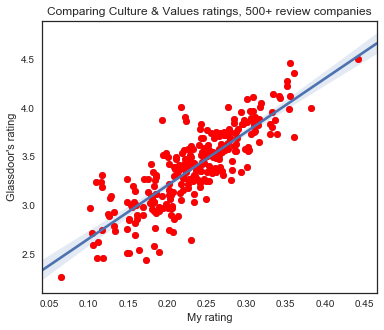

In [29]:
cat = 'Culture & Values'

plt.figure(figsize=(6,5))

plt.plot(pros_cons_my_means.loc[:,cat], 
         reviews_ratings_by_company.loc[:,cat],
        'ro')

sns.regplot(pros_cons_my_means.loc[:,cat], 
         reviews_ratings_by_company.loc[:,cat])

plt.title('Comparing ' + cat + ' ratings, 500+ review companies')

plt.xlabel('My rating')
plt.ylabel("Glassdoor's rating")

plt.savefig('CultureValues.png')

/Users/derekjung/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,"Glassdoor's rating")

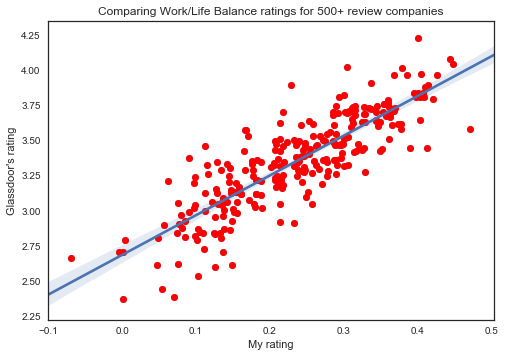

In [30]:
cat = 'Work/Life Balance'

plt.plot(pros_cons_my_means.loc[:,cat], 
         reviews_ratings_by_company.loc[:,cat],
        'ro')

sns.regplot(pros_cons_my_means.loc[:,cat], 
         reviews_ratings_by_company.loc[:,cat])

plt.title('Comparing ' + cat + ' ratings for 500+ review companies')

plt.xlabel('My rating')
plt.ylabel("Glassdoor's rating")

/Users/derekjung/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,"Glassdoor's rating")

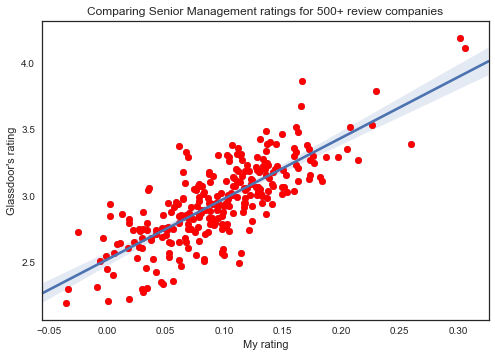

In [31]:
cat = 'Senior Management'

plt.plot(pros_cons_my_means.loc[:,cat], 
         reviews_ratings_by_company.loc[:,cat],
        'ro')

sns.regplot(pros_cons_my_means.loc[:,cat], 
         reviews_ratings_by_company.loc[:,cat])

plt.title('Comparing ' + cat + ' ratings for 500+ review companies')

plt.xlabel('My rating')
plt.ylabel("Glassdoor's rating")

/Users/derekjung/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,"Glassdoor's rating")

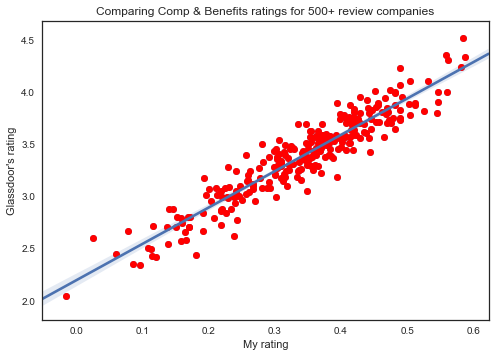

In [32]:
cat = 'Comp & Benefits'

plt.plot(pros_cons_my_means.loc[:,cat], 
         reviews_ratings_by_company.loc[:,cat],
        'ro')

sns.regplot(pros_cons_my_means.loc[:,cat], 
         reviews_ratings_by_company.loc[:,cat])

plt.title('Comparing ' + cat + ' ratings for 500+ review companies')

plt.xlabel('My rating')
plt.ylabel("Glassdoor's rating")

/Users/derekjung/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,"Glassdoor's rating")

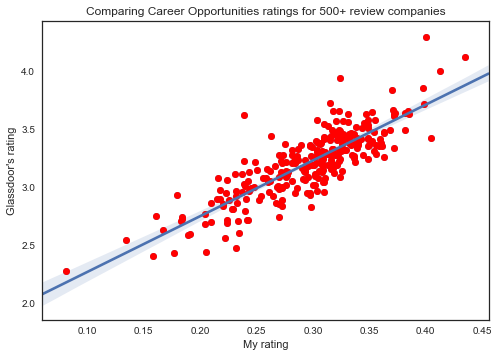

In [33]:
cat = 'Career Opportunities'

plt.plot(pros_cons_my_means.loc[:,cat], 
         reviews_ratings_by_company.loc[:,cat],
        'ro')

sns.regplot(pros_cons_my_means.loc[:,cat], 
         reviews_ratings_by_company.loc[:,cat])

plt.title('Comparing ' + cat + ' ratings for 500+ review companies')

plt.xlabel('My rating')
plt.ylabel("Glassdoor's rating")

## Compute correlation coefficients

In [34]:
def polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

In [35]:
for cat in categories:
    print(cat)
    print(np.sqrt(polyfit(pros_cons_my_means.loc[:,cat], reviews_ratings_by_company.loc[:,cat], 1)['determination']))
    

Culture & Values
0.8323684297836376
Work/Life Balance
0.8466707113146714
Senior Management
0.779043748839694
Comp & Benefits
0.9400166930073465
Career Opportunities
0.8409993568537057


## Narrowing in on Culture & Values

I will find two companies that are very close in my score, but differ highly in Glassdoor's ratings. This will help show the added value of my product over Glassdoor.

/Users/derekjung/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


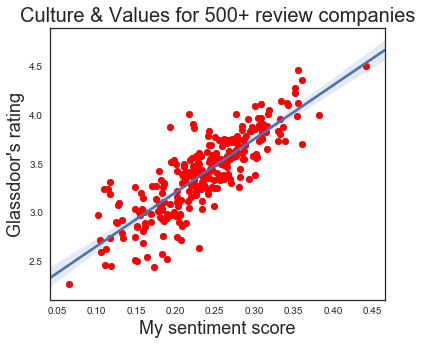

In [36]:
cat = 'Culture & Values'

plt.figure(figsize=(6,5))

plt.plot(pros_cons_my_means.loc[:,cat], 
         reviews_ratings_by_company.loc[:,cat],
        'ro')

sns.regplot(pros_cons_my_means.loc[:,cat], 
         reviews_ratings_by_company.loc[:,cat])

plt.title(cat + ' for 500+ review companies', fontsize=20)

plt.xlabel('My sentiment score', fontsize=18)
plt.ylabel("Glassdoor's rating", fontsize=18)

plt.savefig('CultureValues.png')

In [37]:
#Culture & Values ratings I computed for companies
my_culture_ratings = pros_cons_my_means.loc[:,'Culture & Values']

#Culture & Values ratings from Glassdoor stars
glassdoor_culture_ratings = reviews_ratings_by_company.loc[:,'Culture & Values']

#merge into one DataFrame
all_culture_ratings = pd.DataFrame.from_dict({'My Culture & Values': my_culture_ratings,
                       'Glassdoor Culture & Values': glassdoor_culture_ratings})

In [38]:
all_culture_ratings.head()

,My Culture & Values,Glassdoor Culture & Values
Company Id,,
8,0.185291,3.309156
12,0.231149,3.419383
15,0.281169,3.265032
16,0.184494,3.265169
28,0.217212,3.051659


/Users/derekjung/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,"Glassdoor's rating")

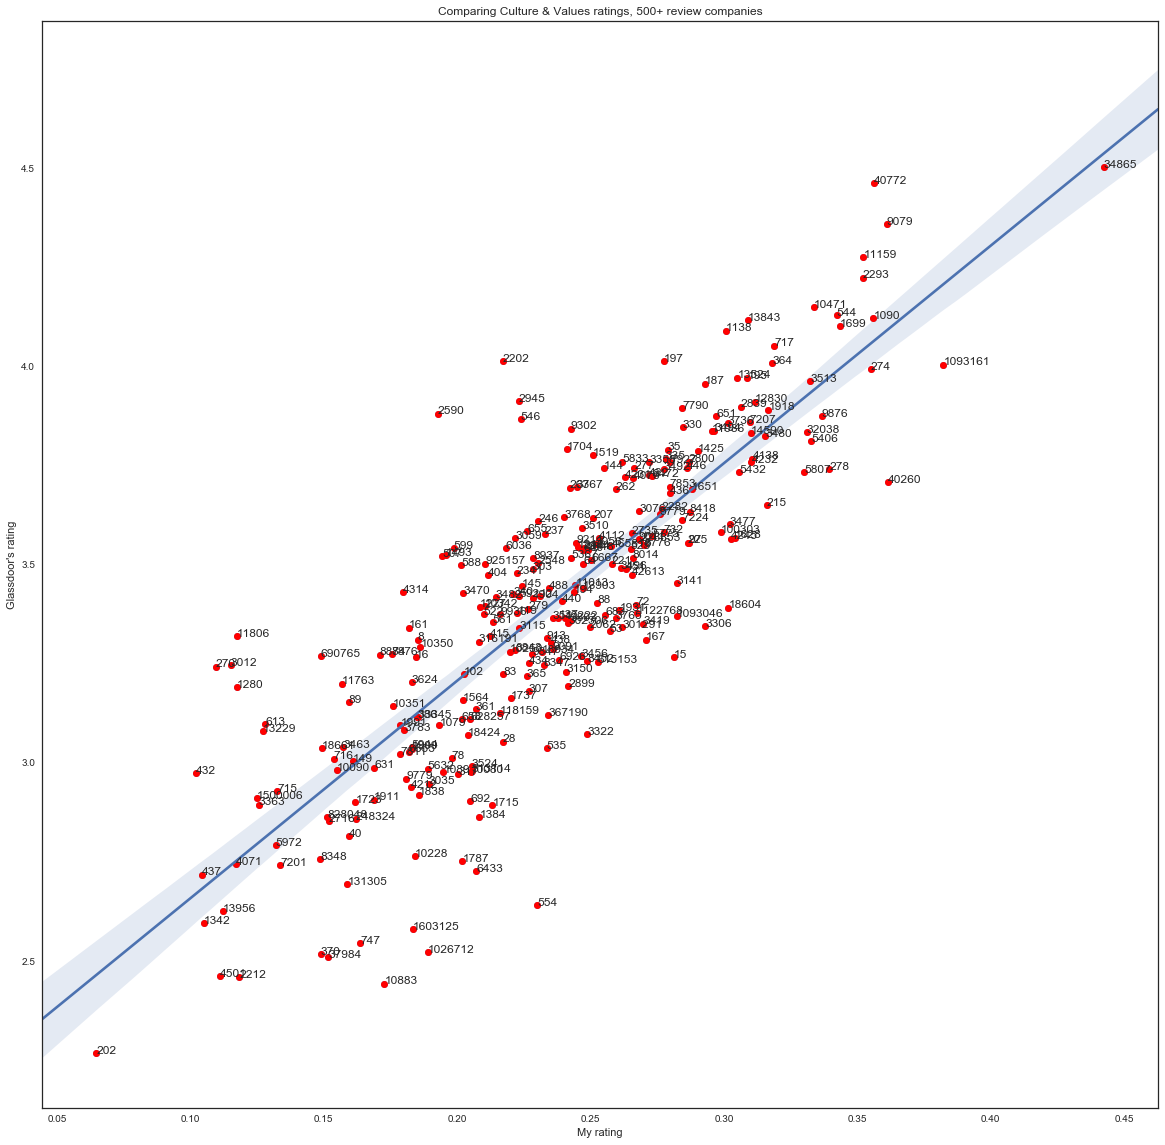

In [39]:
#display points with company ID labels
#    to find companies that differ little in my scores, but greatly in Glassdoor's

cat = 'Culture & Values'

plt.figure(figsize=(20,20))

plt.plot(all_culture_ratings.loc[:,'My Culture & Values'], 
         all_culture_ratings.loc[:,'Glassdoor Culture & Values'],
        'ro')

sns.regplot(all_culture_ratings.loc[:,'My Culture & Values'], 
         all_culture_ratings.loc[:,'Glassdoor Culture & Values'])

for comp_id in all_culture_ratings.index:
    plt.text(all_culture_ratings.loc[comp_id,'My Culture & Values'], 
             all_culture_ratings.loc[comp_id,'Glassdoor Culture & Values'], 
             str(comp_id))

plt.title('Comparing ' + cat + ' ratings, 500+ review companies')

plt.xlabel('My rating')
plt.ylabel("Glassdoor's rating")

In [40]:
#candidates for companies to show
all_culture_ratings.loc[[554,546,2202,1026712],:]

,My Culture & Values,Glassdoor Culture & Values
Company Id,,
554,0.230025,2.639259
546,0.223918,3.864377
2202,0.217183,4.010793
1026712,0.189105,2.521503


In [42]:
companies[companies['Company Id'].isin([554,546, 2202,1787,1026712,1603125])]

,Ticker Symbol,Ticker Sector,Ticker Industry,Company Id,Company URL,company_name,count
92,nasdaq:sbux,Consumer Services,Travel & Leisure,2202,https://www.glassdoor.com/Overview/Working-at-...,Starbucks,817
177,nyse:fdc,Industrials,Support Services,1787,https://www.glassdoor.com/Overview/Working-at-...,First Data,709
300,nyse:dxc,NaN,NaN,1603125,https://www.glassdoor.com/Overview/Working-at-...,DXC Technology,948
344,nyse:pgr,Financials,Nonlife Insurance,546,https://www.glassdoor.com/Overview/Working-at-...,Progressive Insurance,547
917,nasdaq:khc,Consumer Goods,Food Producers,1026712,https://www.glassdoor.com/Overview/Working-at-...,Kraft Heinz Company,795
1658,nasdaq:rrd,NaN,NaN,554,https://www.glassdoor.com/Overview/Working-at-...,R R Donnelley,596


/Users/derekjung/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


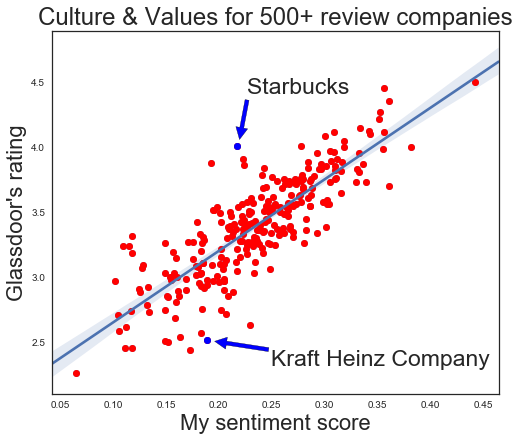

In [46]:
cat = 'Culture & Values'

plt.figure(figsize=(8,6.67))

plt.plot(all_culture_ratings.loc[:,'My Culture & Values'], 
         all_culture_ratings.loc[:,'Glassdoor Culture & Values'],
        'ro')

plt.plot(all_culture_ratings.loc[2202,'My Culture & Values'], 
         all_culture_ratings.loc[2202,'Glassdoor Culture & Values'],
        'bo')

plt.plot(all_culture_ratings.loc[1026712,'My Culture & Values'], 
         all_culture_ratings.loc[1026712,'Glassdoor Culture & Values'],
        'bo')

sns.regplot(all_culture_ratings.loc[:,'My Culture & Values'], 
         all_culture_ratings.loc[:,'Glassdoor Culture & Values'])

    
#put arrow on Starbucks  
plt.annotate("Starbucks", 
             xy=(all_culture_ratings.loc[2202,'My Culture & Values']+0.0025,
                all_culture_ratings.loc[2202,'Glassdoor Culture & Values']+.05), 
             xytext=(all_culture_ratings.loc[2202,'My Culture & Values']+.01,
                all_culture_ratings.loc[2202,'Glassdoor Culture & Values']+.4),
             size=23,
            arrowprops=dict(facecolor='blue', shrink=0)
            )

#put arrow on Kraft Heinz Company
plt.annotate("Kraft Heinz Company", 
             xy=(all_culture_ratings.loc[1026712,'My Culture & Values']+ .007,
                all_culture_ratings.loc[1026712,'Glassdoor Culture & Values'] - 0.01), 
             xytext=(all_culture_ratings.loc[1026712,'My Culture & Values']+.06,
                all_culture_ratings.loc[1026712,'Glassdoor Culture & Values']-.2),
             size=23,
            arrowprops=dict(facecolor='blue', shrink=0),
            )

plt.title(cat + ' for 500+ review companies', fontsize=24)

plt.xlabel('My sentiment score', fontsize=22)
plt.ylabel("Glassdoor's rating", fontsize=22)

plt.savefig('culture_values_comparison.png')